In [139]:
# 라이브러리 임포트
import numpy as np
import random
import matplotlib.pyplot as plt

In [140]:
# 확률 행렬 P
P = np.array([[0.7, 0.2, 0.1], [0.3, 0.65, 0.05], [0.15, 0.35, 0.5]])

In [141]:
# 이전 코드
def func(N):
    w = 3
    X = [3]

    for _ in range(1, N):
        r = random.uniform(0, 1)

        if w == 1:
            if r < 0.7:
                w = 1
            elif 0.7 <= r < 0.9:
                w = 2
            else:
                w = 3

        elif w == 2:
            if r < 0.3:
                w = 1
            elif 0.3 <= r < 0.95:
                w = 2
            else:
                w = 3

        else:
            if r < 0.15:
                w = 1
            elif 0.15 <= r < 0.5:
                w = 2
            else:
                w = 3

        X.append(w)

    return X

In [142]:
# t=0~10까지 날씨를 T번 구하여 행렬 형태로
def time10(T):
    result = []
    for _ in range(T):
        result.append(np.array(func(11)))

    return np.array(result)

In [143]:
time10(10)

array([[3, 2, 1, 1, 3, 2, 1, 1, 1, 2, 2],
       [3, 3, 1, 1, 1, 1, 2, 1, 1, 2, 1],
       [3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2],
       [3, 3, 1, 2, 2, 3, 3, 2, 2, 2, 1],
       [3, 3, 1, 3, 2, 2, 2, 3, 3, 3, 3],
       [3, 3, 2, 1, 3, 2, 1, 1, 1, 1, 1],
       [3, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2],
       [3, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1],
       [3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2],
       [3, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2]])

In [144]:
pi0 = np.array([0,0,1]) # pi(0) 벡터 지정
pi_matrix = np.zeros((11, len(pi0))) # 11행 3열짜리 0행렬

for i in range(0, 11):
    pi_matrix[i] = pi0 # 각 행에 pi(i) 저장
    pi0 = np.dot(pi0, P) # pi(i) = pi(i-1) x P

print(pi_matrix)

[[0.         0.         1.        ]
 [0.15       0.35       0.5       ]
 [0.285      0.4325     0.2825    ]
 [0.371625   0.437      0.191375  ]
 [0.41994375 0.42535625 0.1547    ]
 [0.4447725  0.41461531 0.14061219]
 [0.45681717 0.40766872 0.13551411]
 [0.46239975 0.40377804 0.13382221]
 [0.46488657 0.40177345 0.13333998]
 [0.46595363 0.40079905 0.13324732]
 [0.46639435 0.40034667 0.13325898]]


Sunny P: [0.0, 0.1476, 0.2838, 0.366, 0.4146, 0.4389, 0.4544, 0.4646, 0.4603, 0.4636, 0.4685]
Cloudy P: [0.0, 0.3495, 0.4297, 0.4357, 0.4271, 0.4127, 0.4026, 0.3991, 0.4033, 0.4031, 0.3969]
Rainy P: [1.0, 0.5029, 0.2865, 0.1983, 0.1583, 0.1484, 0.143, 0.1363, 0.1364, 0.1333, 0.1346]
[[0.         0.         1.        ]
 [0.15       0.35       0.5       ]
 [0.285      0.4325     0.2825    ]
 [0.371625   0.437      0.191375  ]
 [0.41994375 0.42535625 0.1547    ]
 [0.4447725  0.41461531 0.14061219]
 [0.45681717 0.40766872 0.13551411]
 [0.46239975 0.40377804 0.13382221]
 [0.46488657 0.40177345 0.13333998]
 [0.46595363 0.40079905 0.13324732]
 [0.46639435 0.40034667 0.13325898]]


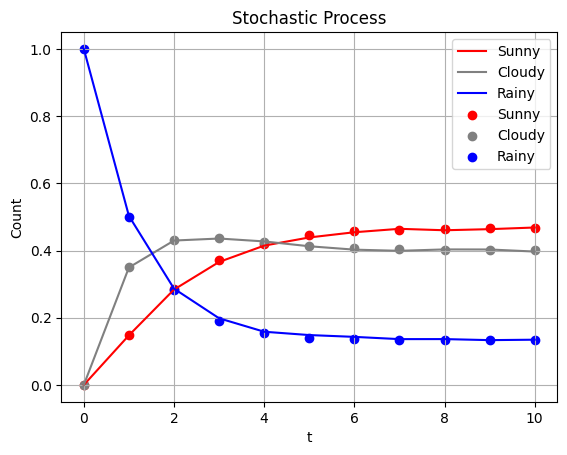

In [145]:
S_list = []
C_list = []
R_list = []

ans = time10(10000) # T=10000

for i in range(0,11): # 각 시간마다의 S, C, R 갯수 counting
    S_list.append((list(ans[:,i]).count(1))/10000) # 10000으로 나누어 전체 합이 1이 되는 확률로
    C_list.append((list(ans[:,i]).count(2))/10000)
    R_list.append((list(ans[:,i]).count(3))/10000)

print('Sunny P:', S_list)
print('Cloudy P:', C_list)
print('Rainy P:', R_list)
print(pi_matrix)

t = list(range(11)) # t=0~10

plt.plot(t, S_list, color='red', label='Sunny')
plt.plot(t, C_list, color='gray', label='Cloudy')
plt.plot(t, R_list, color='blue', label='Rainy')
plt.scatter(t, list(pi_matrix[:,0]), color='red', label='Sunny')
plt.scatter(t, list(pi_matrix[:,1]), color='gray', label='Cloudy')
plt.scatter(t, list(pi_matrix[:,2]), color='blue', label='Rainy')

plt.xlabel('t')
plt.ylabel('Count')
plt.title('Stochastic Process')
plt.legend()
plt.grid(True)
plt.show()

In [146]:
# 확률 행렬 P
P = np.array([[0.7, 0.2, 0.1], [0.3, 0.65, 0.05], [0.15, 0.35, 0.5]])
# P의 전치 행렬로 고윳값, 고유벡터를 구함
value, vector = np.linalg.eig(np.transpose(P))
# 각 고윳값과 고유벡터(열벡터) 출력
for i in range(0,3):
    print('value:', value[i], 'vector:', vector[:,i])

value: (0.9999999999999989+0j) vector: [0.74199852+0.j 0.63599873+0.j 0.21199958+0.j]
value: (0.4249999999999997+0.08291561975888505j) vector: [ 0.65465367+0.j         -0.54554473+0.36187343j -0.10910895-0.36187343j]
value: (0.4249999999999997-0.08291561975888505j) vector: [ 0.65465367-0.j         -0.54554473-0.36187343j -0.10910895+0.36187343j]


In [147]:
V1 = vector[:,0]

In [148]:
V1/sum(V1)

array([0.46666667+0.j, 0.4       +0.j, 0.13333333+0.j])

In [149]:
np.linalg.norm(V1)

1.0

v1 = (0.4666666666666667+0j)
v2 = (0.4000000000000001+0j)
v3 = (0.1333333333333334+0j)


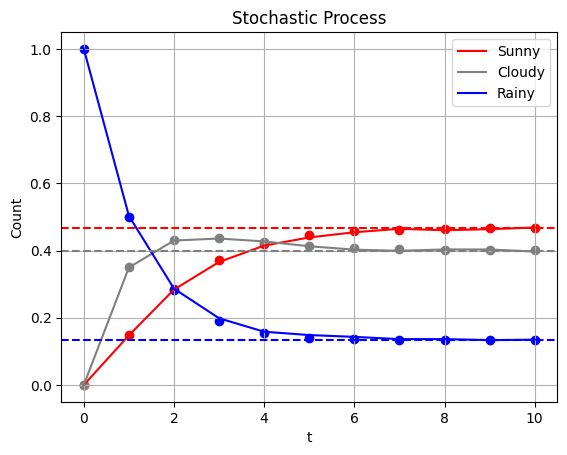

In [153]:
# 확률과정 그래프와 같이 plot
vectors1 = V1/sum(V1)
for i in range(0,3):
    print(f'v{i+1} = {vectors1[i]}')

plt.plot(t, S_list, color='red', label='Sunny')
plt.plot(t, C_list, color='gray', label='Cloudy')
plt.plot(t, R_list, color='blue', label='Rainy')
plt.scatter(t, list(pi_matrix[:,0]), color='red')
plt.scatter(t, list(pi_matrix[:,1]), color='gray')
plt.scatter(t, list(pi_matrix[:,2]), color='blue')
plt.axhline(y=vectors1[0], color='red', linestyle='--')
plt.axhline(y=vectors1[1], color='gray', linestyle='--')
plt.axhline(y=vectors1[2], color='blue', linestyle='--')

plt.xlabel('t')
plt.ylabel('Count')
plt.title('Stochastic Process')
plt.legend()
plt.grid(True)
plt.show()